In [1]:
from model.house_mask import HouseMask
from model.config import Config
from model.data_provider import DataProvider
from utils.anotations_parser import parse_anotation
from utils.plot_history import plot_history

from numpy.random import seed
from tensorflow.random import set_seed

seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

config = Config()

In [2]:
annotations = parse_anotation('data/train/annotations.json')
train_annotations = annotations[0 : 125]
test_annotations = annotations[125:]

# train_annotations = parse_anotation('data/train/annotations.json')
train_data_provider = DataProvider(config, train_annotations)

# test_annotations = parse_anotation('data/test/annotations.json')
test_data_provider = DataProvider(config, test_annotations)

In [3]:
from model.unet_model import UNetModel
model_provider = UNetModel()

In [4]:
model = HouseMask(config, train_data_provider, test_data_provider, model_provider)

2022-12-05 15:03:38.565963: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-05 15:03:38.566096: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [5]:
model.train()

Epoch 1/150


2022-12-05 15:03:41.164679: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-05 15:03:42.877581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 5.0372 - accuracy: 0.0484

2022-12-05 15:03:49.542785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 9s 516ms/step - loss: 5.0372 - accuracy: 0.0484 - val_loss: 3.7095 - val_accuracy: 0.0000e+00
Epoch 2/150
8/8 [==============================] - 3s 428ms/step - loss: 1.1200 - accuracy: 0.0014 - val_loss: 3.9000 - val_accuracy: 0.0000e+00
Epoch 3/150
8/8 [==============================] - 3s 424ms/step - loss: 0.5500 - accuracy: 5.9764e-06 - val_loss: 2.6909 - val_accuracy: 0.0000e+00
Epoch 4/150
8/8 [==============================] - 3s 422ms/step - loss: 0.5315 - accuracy: 0.0000e+00 - val_loss: 5.0685 - val_accuracy: 0.0000e+00
Epoch 5/150
8/8 [==============================] - 3s 422ms/step - loss: 0.8344 - accuracy: 2.5489e-04 - val_loss: 2.5167 - val_accuracy: 0.0000e+00
Epoch 6/150
8/8 [==============================] - 3s 428ms/step - loss: 0.8435 - accuracy: 1.2716e-07 - val_loss: 2.2900 - val_accuracy: 0.0000e+00
Epoch 7/150
8/8 [==============================] - 3s 423ms/step - loss: 0.4571 - accuracy: 0.0000e+00 - val_loss: 1.1588 - va

In [20]:
plot_history(model.model.history)

KeyError: 'loss'

In [7]:
pred = model.predict(test_data_provider)

2022-12-05 15:12:42.627132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 124ms/step


In [25]:
mask = model.prediction_to_mask(pred[2])

In [16]:
x,y = test_data_provider.__getitem__(0)

In [18]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

(<AxesSubplot: title={'center': 'prediction result'}>,
 Text(0.5, 1.0, 'prediction result'))

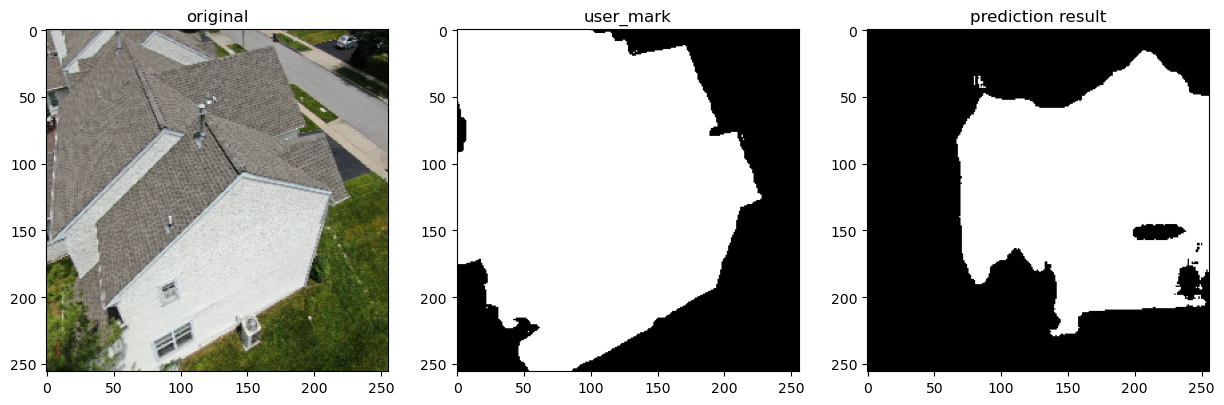

In [26]:


plt.subplot(131), plt.imshow(x[2]), plt.title('original')
plt.subplot(132), plt.imshow(y[2],cmap='gray'), plt.title('user_mark')
plt.subplot(133), plt.imshow(mask, cmap='gray'), plt.title('prediction result')
